In [1]:
from PIL import Image
import pytesseract
import pandas as pd
import numpy as np
import json

In [2]:
import configparser
config = configparser.ConfigParser()
config.read('config.ini')
pytesseract.pytesseract.tesseract_cmd = config['DEFAULT']['tesseract_cmd']
custom_config = config['DEFAULT']['tesseract_config']

In [3]:
img_path = r'ICDAR-2019-SROIE\data\img\000.jpg'
img = Image.open(img_path)
text = pytesseract.image_to_string(img,config=custom_config)
print(text)

tan woon yann
BOOK TA -K (TAMAN DAYA) SDN BHD
789417-W
NO.5? $5,57 & 59, JALAN SAGU 18,
TAMAN DAYA
81100 JOHOR BAHRU.
JOHOR.
1 | "
UG GAO
Document No TDO1167104
Date 25/12/2018 8:13:39 PM
Cashier MANIS
Member
CASH BILL
CODE/DESC PRICE Dise AMOUIHT
Qly RM RM
9556929040116 KF MODELLING CLAY KIDDY FISH :
1 PC * 9.00) 0,00 9.00
Total : 91.00
Rour ding Adjustment 0.00
Round. :d Total (RM): 9.00
Cash oy 40.00.
CHANGE 00
00
GOODS SOLD ARE NOT RETURNAR aK
EXCHANGEABLE
MAT, SEMA I
THANK YOU
PLEASE COME AGAIN t



In [4]:
label_path = r'ICDAR-2019-SROIE\data\key\000.json'

with open(label_path) as fp:
    label = json.load(fp)
entities = list(label.keys())
str(label)

"{'company': 'BOOK TA .K (TAMAN DAYA) SDN BHD', 'date': '25/12/2018', 'address': 'NO.53 55,57 & 59, JALAN SAGU 18, TAMAN DAYA, 81100 JOHOR BAHRU, JOHOR.', 'total': '9.00'}"

In [5]:
box_path = r'ICDAR-2019-SROIE\data\box\000.csv'
import csv
with open(box_path, "r") as fp:
    reader = csv.reader(fp, delimiter=",")
    ## arranging dataframe index ,coordinates x1_1,y1_1,x2_1,y2_1,x3_1,y3_1,x4_1,y4_1, transcript
    rows = [x[:8] + [','.join(x[8:]).strip(',')] for x in reader] 
    df = pd.DataFrame(rows)
df.head()

,0,1,2,3,4,5,6,7,8
0,72,25,326,25,326,64,72,64,TAN WOON YANN
1,50,82,440,82,440,121,50,121,BOOK TA .K(TAMAN DAYA) SDN BND
2,205,121,285,121,285,139,205,139,789417-W
3,110,144,383,144,383,163,110,163,"NO.53 55,57 & 59, JALAN SAGU 18"
4,192,169,299,169,299,187,192,187,TAMAN DAYA


[[ 72  25]
 [326  25]
 [326  64]
 [ 72  64]]
(72, 25, 326, 64)
tan woon yann



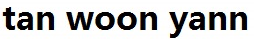

In [6]:
coords = np.array(df.iloc[0][:-1],int).reshape(-1,2)
print(coords)

coords = coords[[0,2]]
coords = tuple(coords.reshape(-1))
print(coords)

text = pytesseract.image_to_string(img.crop(coords),config=custom_config)
print(text)
img.crop(coords)